In [2]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data
df1 = read_excel('idtobank.xlsx')
df2 = read_excel('hashtoid.xlsx')
fraud_data = read_excel('fraud.xlsx', sheet_name='Detail data')

df1 = preprocess_dataframe(df1)
df2 = preprocess_dataframe(df2)

df = pd.concat([df1, df2], ignore_index=True)
fraud_ids = fraud_data['customer_id'].unique()
df['is_fraud'] = df['customer_id'].isin(fraud_ids).astype(object)

df = df.drop_duplicates()
print(len(df.columns))
print(len(fraud_data.columns))

describe_dataframe(df)

57
24
Number of rows: 4063
Number of columns: 57

Column names and data types:
success_redirect_url               object
account_details                    object
expires_at                         object
client                             object
fee                                object
refunded_amount                    object
payment_channel_transaction_id     object
linked_account_id                  object
is_otp_required                    object
otp_mobile_number                  object
settlement_date                    object
failure_code                       object
callback_url                       object
status                             object
channel_account_reference          object
updated                            object
version                            object
checkout_url                       object
vat                                object
client_type                        object
id                                 object
status2                            obje

In [4]:
# Preprocessing

# Drop columns that are not useful for the model
drop_columns = [
    'internal_metadata', 'description','mobile_number', 'otp_mobile_number', 'client_reference',
    'version', 'entity', 'type', 'client', 'status2', 'transacting_entity', 'connector_metadata',
    'vat','currency', 'is_otp_required','fee']

df = df.drop(columns=drop_columns)

# Convert 'is_fraud' to numeric (boolean to int)
df['is_fraud'] = df['is_fraud'].astype(int)

# Convert 'amount' to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['refunded_amount'] = pd.to_numeric(df['refunded_amount'], errors='coerce')

# Create the bins using pd.qcut
bins = pd.qcut(df['amount'], 10, duplicates='drop', precision=2)

# Assign the bin intervals to the 'amount_bins' column
df['amount_bins'] = bins.astype(str)


# Verify the bins
print(df[['amount', 'amount_bins']].head(20))


# Create the bins using pd.qcut
refunded_bins = pd.qcut(df['refunded_amount'], 20, duplicates='drop', precision=2)

# Assign the bin intervals to the 'amount_bins' column
df['refunded_amount_bins'] = refunded_bins.astype(str)

# Verify the bins
print(df[['refunded_amount', 'refunded_amount_bins']].head(20))

      amount         amount_bins
0   10005.00   (9870.0, 10829.4]
1    3157.82    (2156.6, 4999.0]
2    3157.00    (2156.6, 4999.0]
3    9877.16   (9870.0, 10829.4]
4   20005.00  (20000.0, 20005.0]
5    3981.00    (2156.6, 4999.0]
6   20005.00  (20000.0, 20005.0]
7   20005.00  (20000.0, 20005.0]
8   20005.00  (20000.0, 20005.0]
9   20005.00  (20000.0, 20005.0]
10  20005.00  (20000.0, 20005.0]
11  12353.26  (10829.4, 20000.0]
12  11296.06  (10829.4, 20000.0]
13  10348.26   (9870.0, 10829.4]
14  11296.00  (10829.4, 20000.0]
15  20005.00  (20000.0, 20005.0]
16  20005.00  (20000.0, 20005.0]
17  10005.00   (9870.0, 10829.4]
18   1805.00    (1105.0, 2156.6]
19  10005.00   (9870.0, 10829.4]
    refunded_amount refunded_amount_bins
0               0.0                  nan
1               0.0                  nan
2               0.0                  nan
3               0.0                  nan
4               0.0                  nan
5               0.0                  nan
6               0.0 

In [5]:
fraud = df[df['is_fraud'] == 1]
not_fraud = df[df['is_fraud'] == 0]

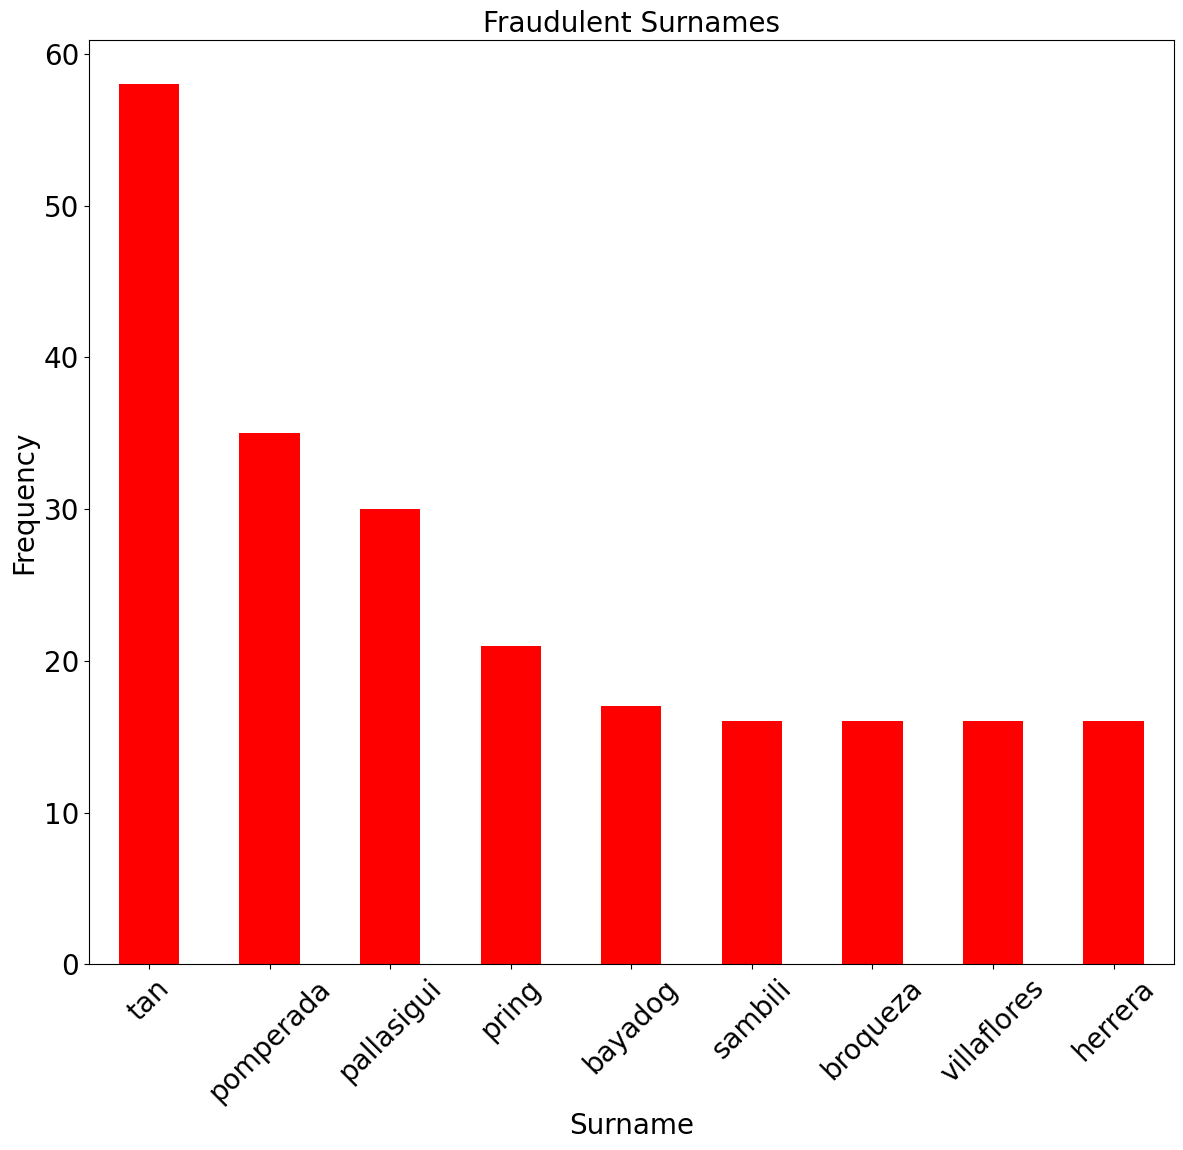

P(Fraud|tan): 0.7379  P(Not Fraud|tan): 0.2621
P(Fraud|pomperada): 1.0000  P(Not Fraud|pomperada): 0.0000
P(Fraud|pallasigui): 1.0000  P(Not Fraud|pallasigui): 0.0000
P(Fraud|pring): 1.0000  P(Not Fraud|pring): 0.0000
P(Fraud|bayadog): 1.0000  P(Not Fraud|bayadog): 0.0000
P(Fraud|sambili): 1.0000  P(Not Fraud|sambili): 0.0000
P(Fraud|broqueza): 1.0000  P(Not Fraud|broqueza): 0.0000
P(Fraud|villaflores): 1.0000  P(Not Fraud|villaflores): 0.0000
P(Fraud|herrera): 1.0000  P(Not Fraud|herrera): 0.0000


In [6]:
# Filter the surnames with more than 15 fraudulent transactions
filtered_surnames = fraud['surname'].value_counts().loc[lambda x: x > 15]



# Plot the number of fraudulent transactions per surname
plt.figure(figsize=(14, 12))
filtered_surnames.plot(kind='bar', title='Fraudulent Surnames', color='red')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Surname', fontsize=20)
plt.title('Fraudulent Surnames', fontsize=20)
plt.show()

filtered_surnames = filtered_surnames.index.tolist()

for name in filtered_surnames:
    f_v, l_v = naive_bayes_conditional_probabilities(df, 'surname', name)
    print(f'P(Fraud|{name}): {f_v:.4f}  P(Not Fraud|{name}): {l_v:.4f}')

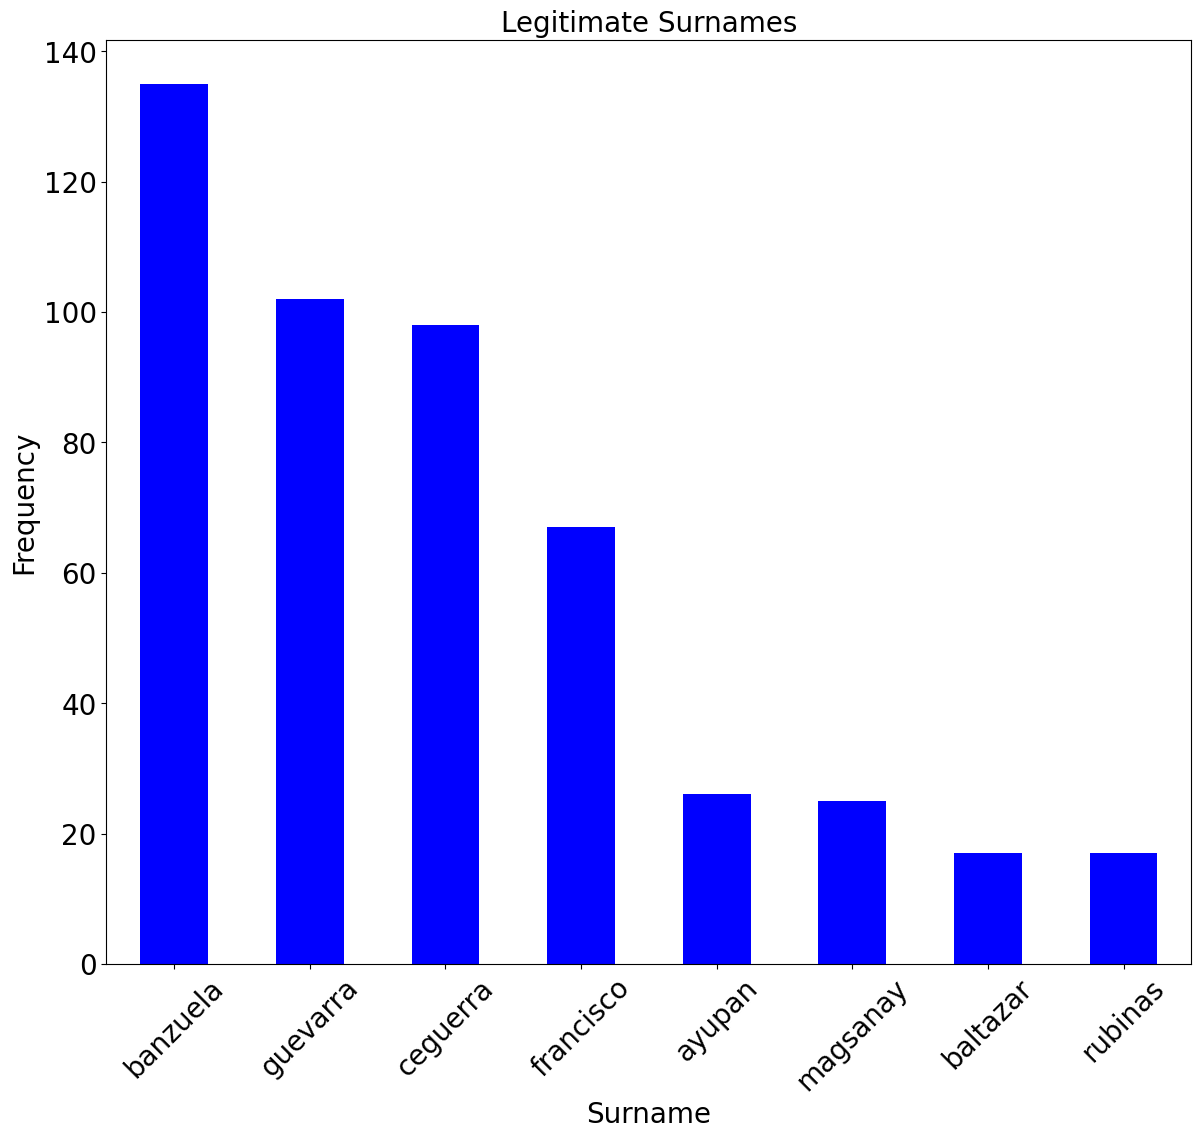

P(Fraud|banzuela): 0.0000  P(Not Fraud|banzuela): 1.0000
P(Fraud|guevarra): 0.0000  P(Not Fraud|guevarra): 1.0000
P(Fraud|ceguerra): 0.0000  P(Not Fraud|ceguerra): 1.0000
P(Fraud|francisco): 0.0535  P(Not Fraud|francisco): 0.9465
P(Fraud|ayupan): 0.0000  P(Not Fraud|ayupan): 1.0000
P(Fraud|magsanay): 0.0000  P(Not Fraud|magsanay): 1.0000
P(Fraud|baltazar): 0.0000  P(Not Fraud|baltazar): 1.0000
P(Fraud|rubinas): 0.0000  P(Not Fraud|rubinas): 1.0000


In [7]:
# Filter the surnames with more than 15 legitimate transactions
filtered_surnames_legit = not_fraud['surname'].value_counts().loc[lambda x: x > 15]

# Plot the number of legitimate transactions per surname
plt.figure(figsize=(14, 12))
filtered_surnames_legit.plot(kind='bar', title='Legitimate Surnames', color='blue')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Surname', fontsize=20)
plt.title('Legitimate Surnames', fontsize=20)
plt.show()

filtered_surnames_legit = filtered_surnames_legit.index.tolist()
# Calculate and print conditional probabilities for each surname
for name in filtered_surnames_legit:
    f_v, l_v = naive_bayes_conditional_probabilities(df, 'surname', name)
    print(f'P(Fraud|{name}): {f_v:.4f}  P(Not Fraud|{name}): {l_v:.4f}')

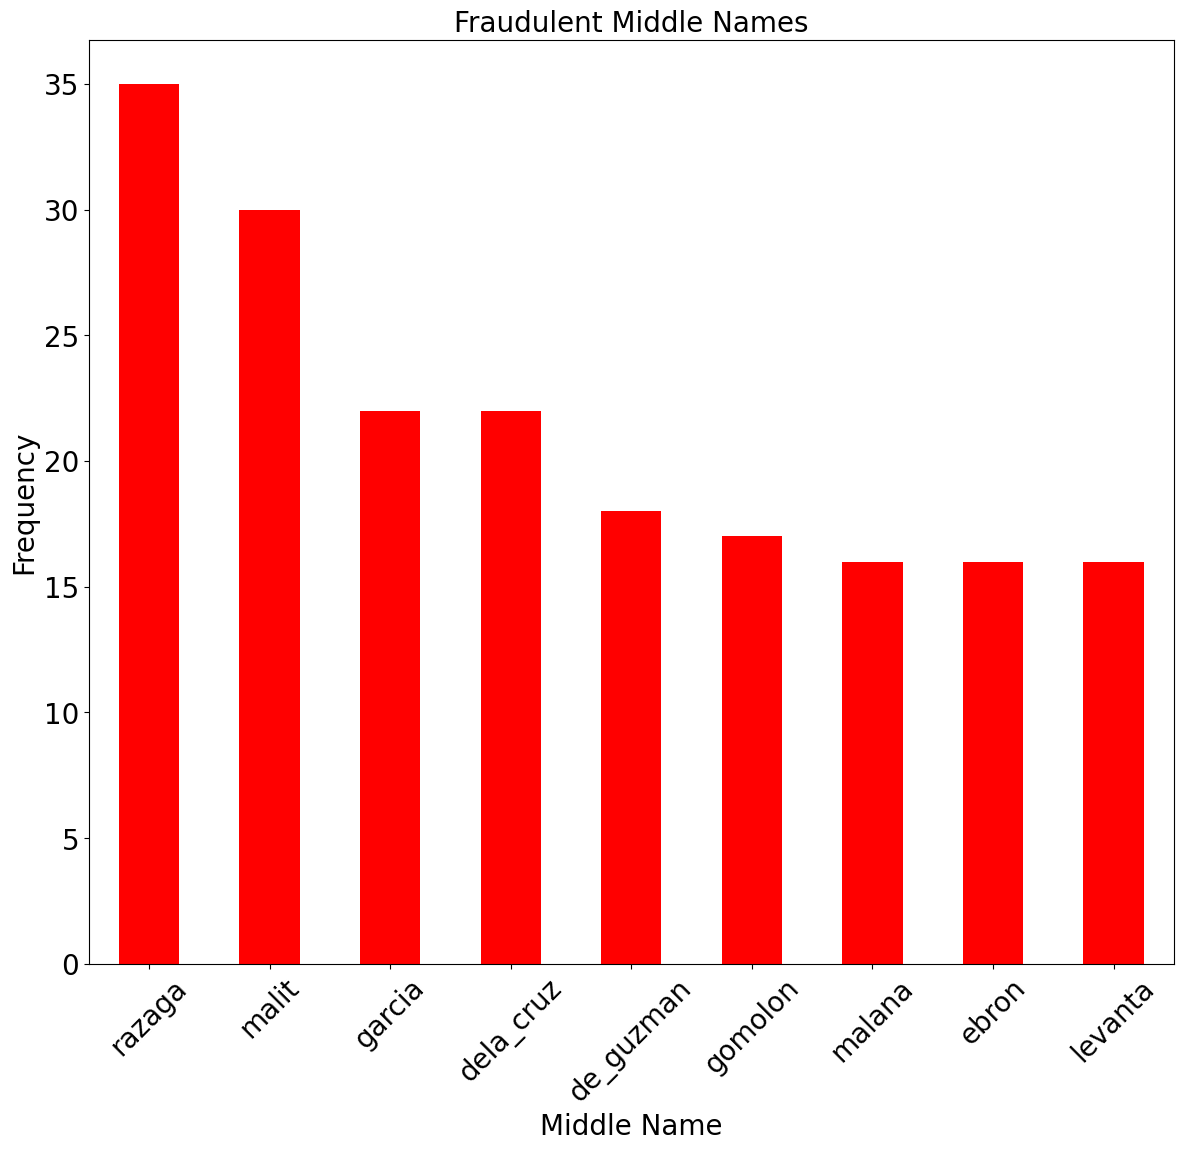

P(Fraud|razaga): 1.0000  P(Not Fraud|razaga): 0.0000
P(Fraud|malit): 1.0000  P(Not Fraud|malit): 0.0000
P(Fraud|garcia): 1.0000  P(Not Fraud|garcia): 0.0000
P(Fraud|dela_cruz): 0.8501  P(Not Fraud|dela_cruz): 0.1499
P(Fraud|de_guzman): 1.0000  P(Not Fraud|de_guzman): 0.0000
P(Fraud|gomolon): 1.0000  P(Not Fraud|gomolon): 0.0000
P(Fraud|malana): 1.0000  P(Not Fraud|malana): 0.0000
P(Fraud|ebron): 1.0000  P(Not Fraud|ebron): 0.0000
P(Fraud|levanta): 1.0000  P(Not Fraud|levanta): 0.0000


In [8]:
# Plot the number of fraudulent transactions per middle name
filtered_middle_names_fraud = fraud['middle_name'].value_counts().loc[lambda x: x > 15]

# Plot the number of fraudulent transactions per middle name
plt.figure(figsize=(14, 12))
filtered_middle_names_fraud.plot(kind='bar', title='Fraudulent Middle Names', color='red')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Middle Name', fontsize=20)
plt.title('Fraudulent Middle Names', fontsize=20)
plt.show()

filtered_middle_names_fraud = filtered_middle_names_fraud.index.tolist()
# Calculate and print conditional probabilities for each middle name
for name in filtered_middle_names_fraud:
    f_v, l_v = naive_bayes_conditional_probabilities(df, 'middle_name', name)
    print(f'P(Fraud|{name}): {f_v:.4f}  P(Not Fraud|{name}): {l_v:.4f}')

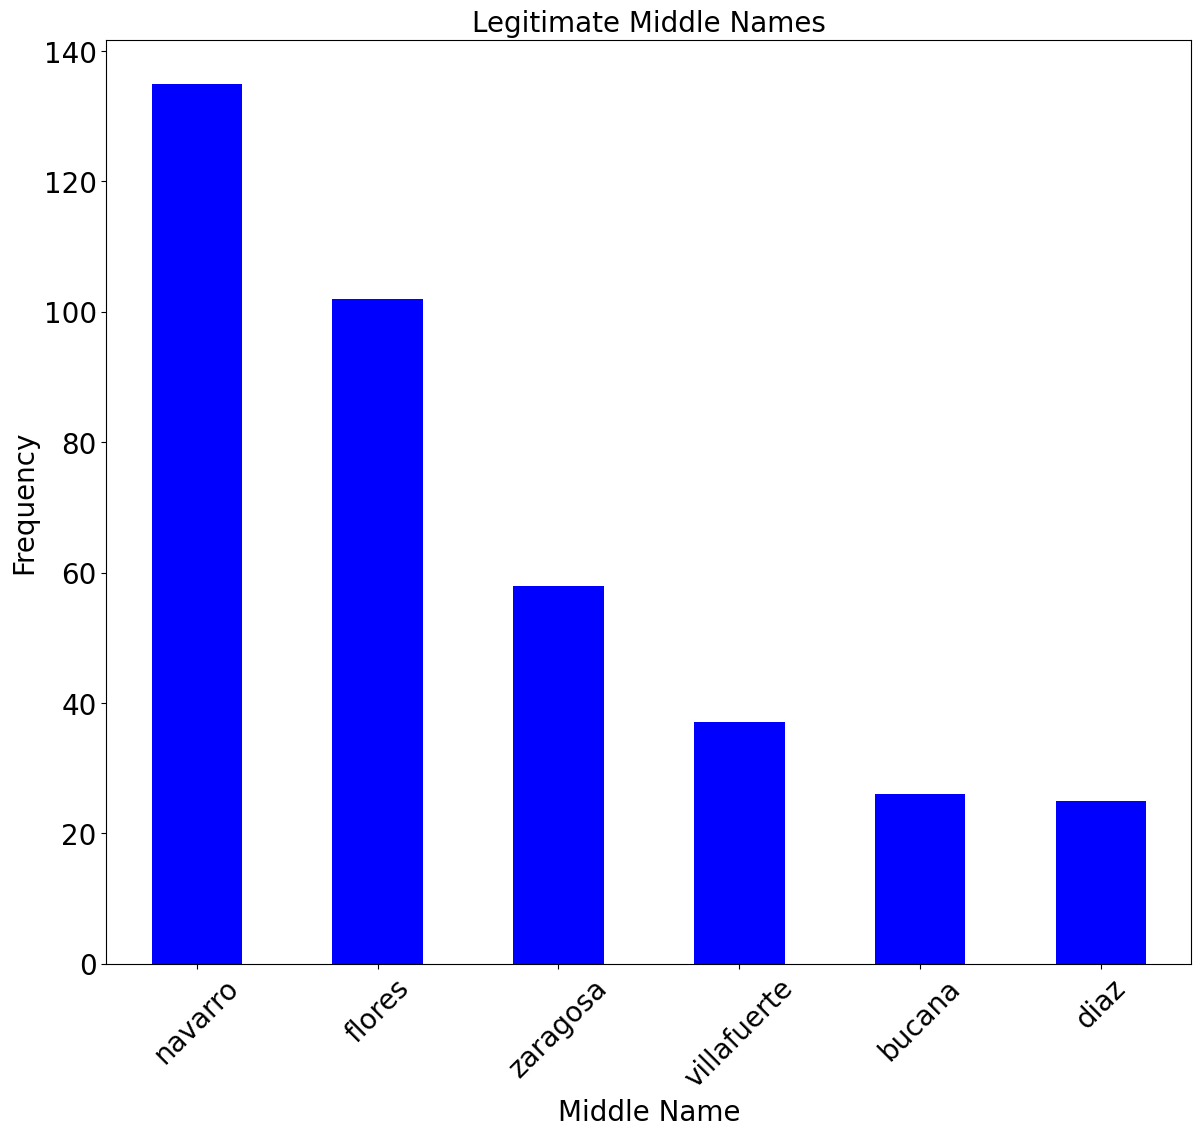

P(Fraud|navarro): 0.0000  P(Not Fraud|navarro): 1.0000
P(Fraud|flores): 0.0149  P(Not Fraud|flores): 0.9851
P(Fraud|zaragosa): 0.0000  P(Not Fraud|zaragosa): 1.0000
P(Fraud|villafuerte): 0.0000  P(Not Fraud|villafuerte): 1.0000
P(Fraud|bucana): 0.0000  P(Not Fraud|bucana): 1.0000
P(Fraud|diaz): 0.0202  P(Not Fraud|diaz): 0.9798


In [9]:
# Plot the number of legit transactions per middle name

# Filter the middle names with more than 15 legitimate transactions
filtered_middle_names_legit = not_fraud['middle_name'].value_counts().loc[lambda x: x > 15]

# Plot the number of legitimate transactions per middle name
plt.figure(figsize=(14, 12))
filtered_middle_names_legit.plot(kind='bar', title='Legitimate Middle Names', color='blue')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Middle Name', fontsize=20)
plt.title('Legitimate Middle Names', fontsize=20)
plt.show()

filtered_middle_names_legit = filtered_middle_names_legit.index.tolist()
# Calculate and print conditional probabilities for each middle name
for name in filtered_middle_names_legit:
    f_v, l_v = naive_bayes_conditional_probabilities(df, 'middle_name', name)
    print(f'P(Fraud|{name}): {f_v:.4f}  P(Not Fraud|{name}): {l_v:.4f}')

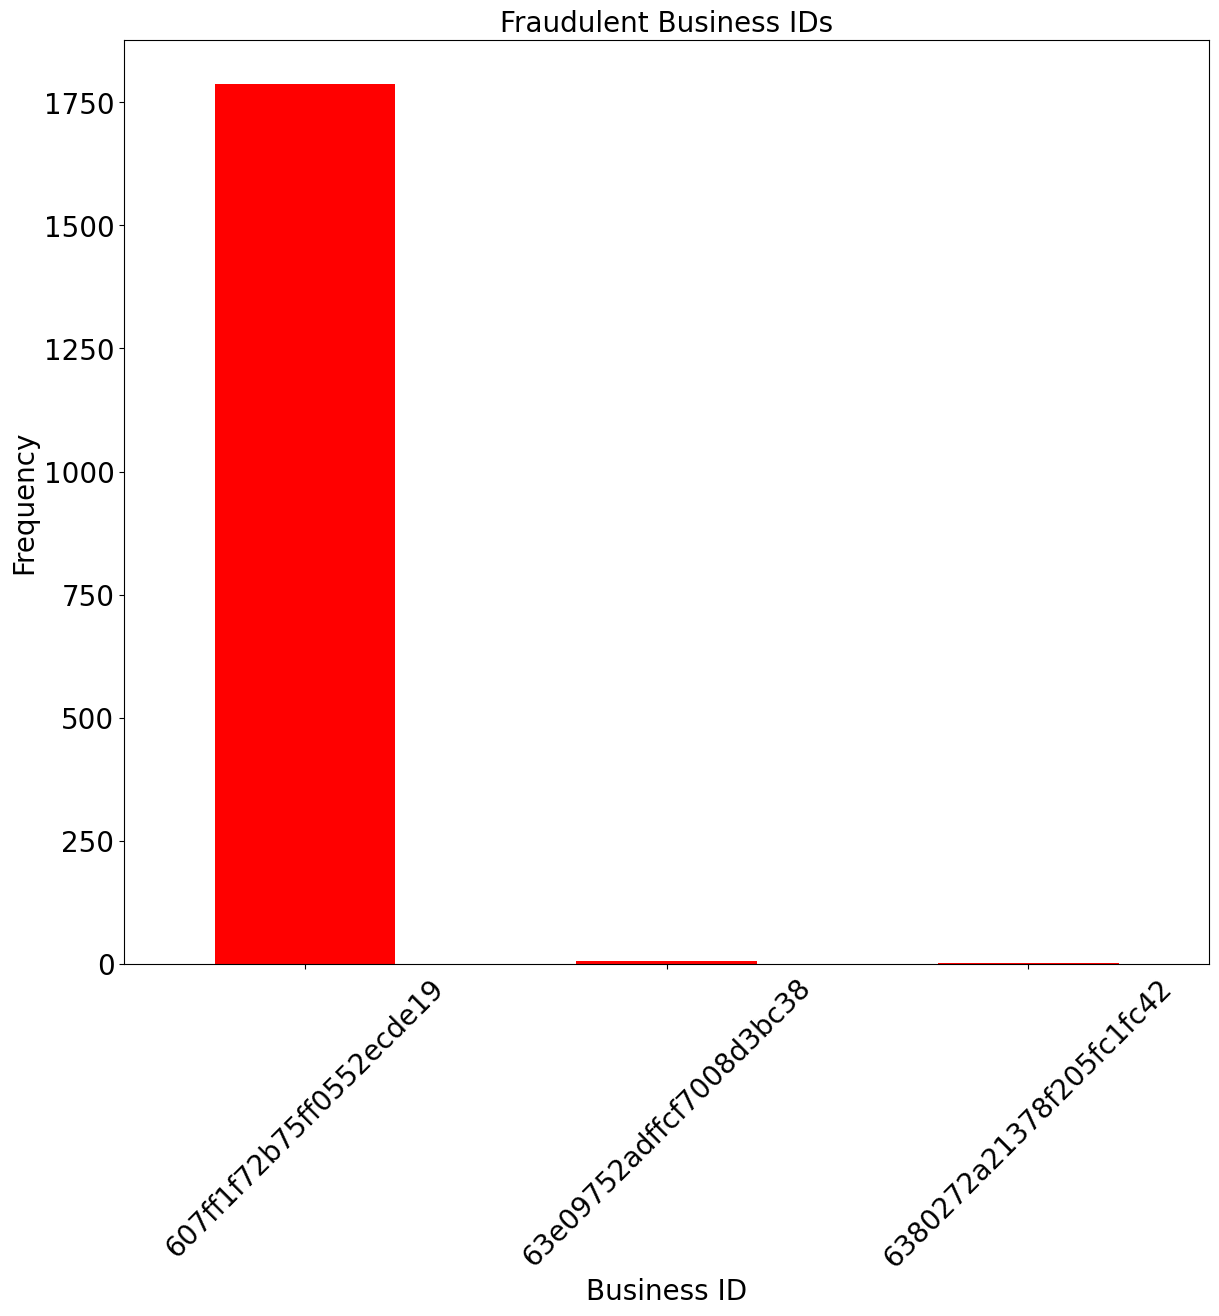

In [10]:
# Plot the number of fraudulent transactions per business_id

plt.figure(figsize=(14, 12))
fraud['business_id'].value_counts().loc[lambda x: x > 0].plot(kind='bar', title='Fraudulent Business IDs', color='red')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Business ID', fontsize=20)
plt.title('Fraudulent Business IDs', fontsize=20)
plt.show()

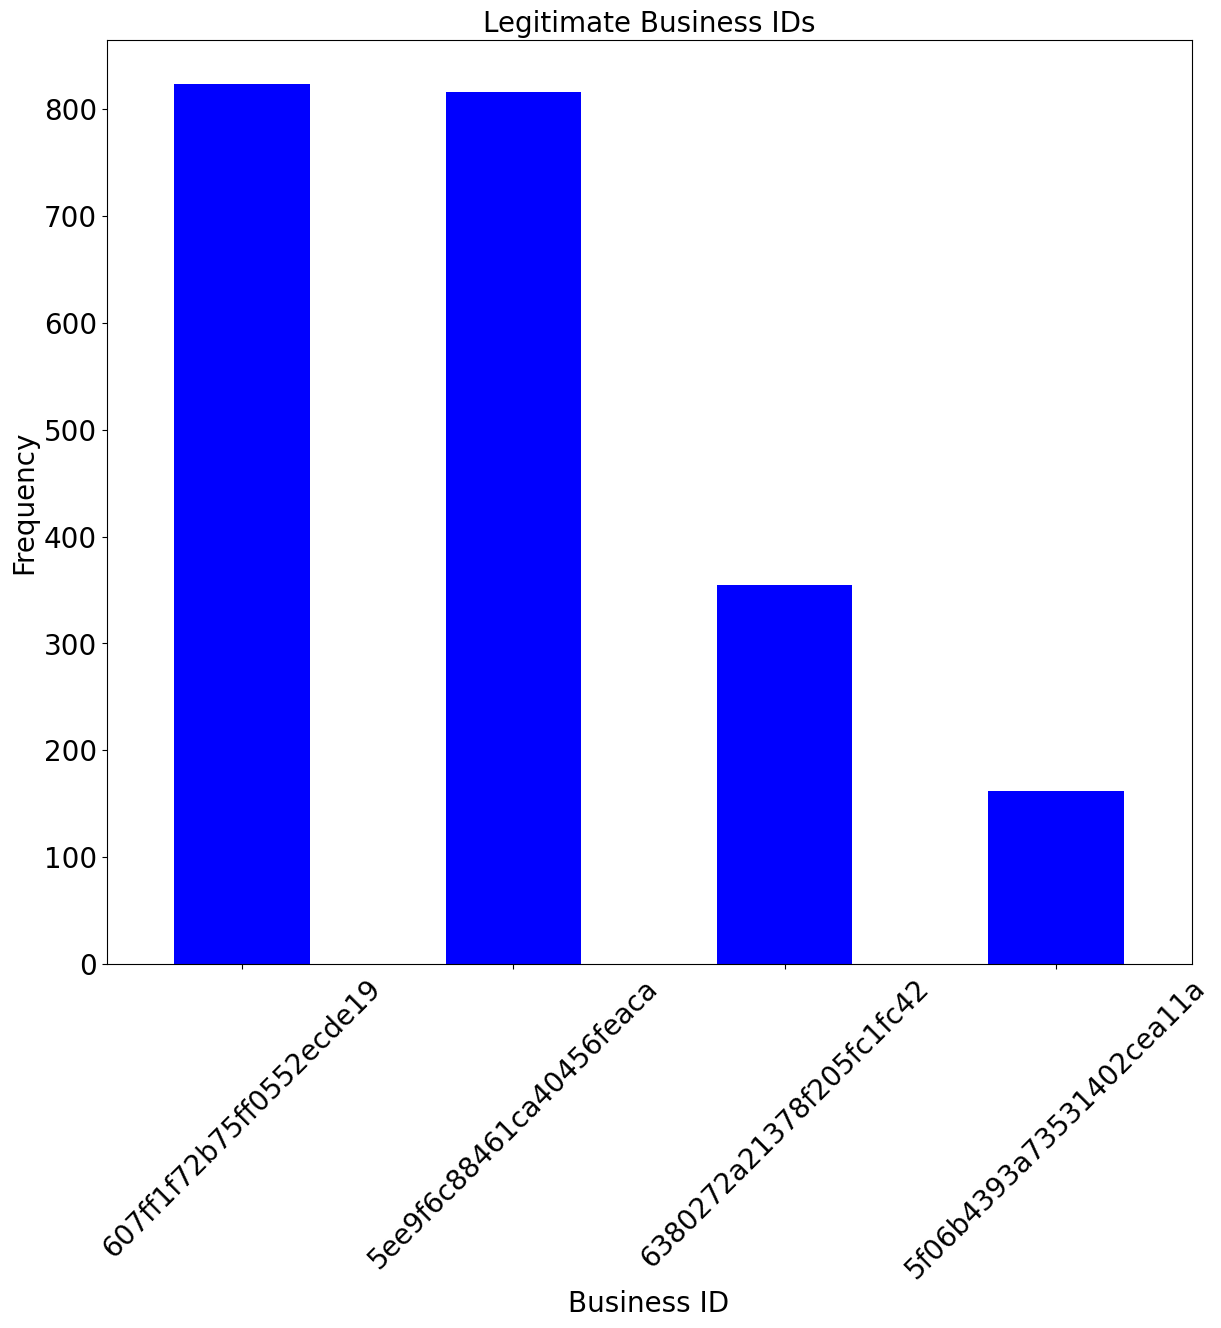

In [11]:
# Plot the number of legit transactions per business_id
plt.figure(figsize=(14, 12))
not_fraud['business_id'].value_counts().loc[lambda x: x > 100].plot(kind='bar', title='Legitimate Business IDs', color='blue')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Business ID', fontsize=20)
plt.title('Legitimate Business IDs', fontsize=20)
plt.show()

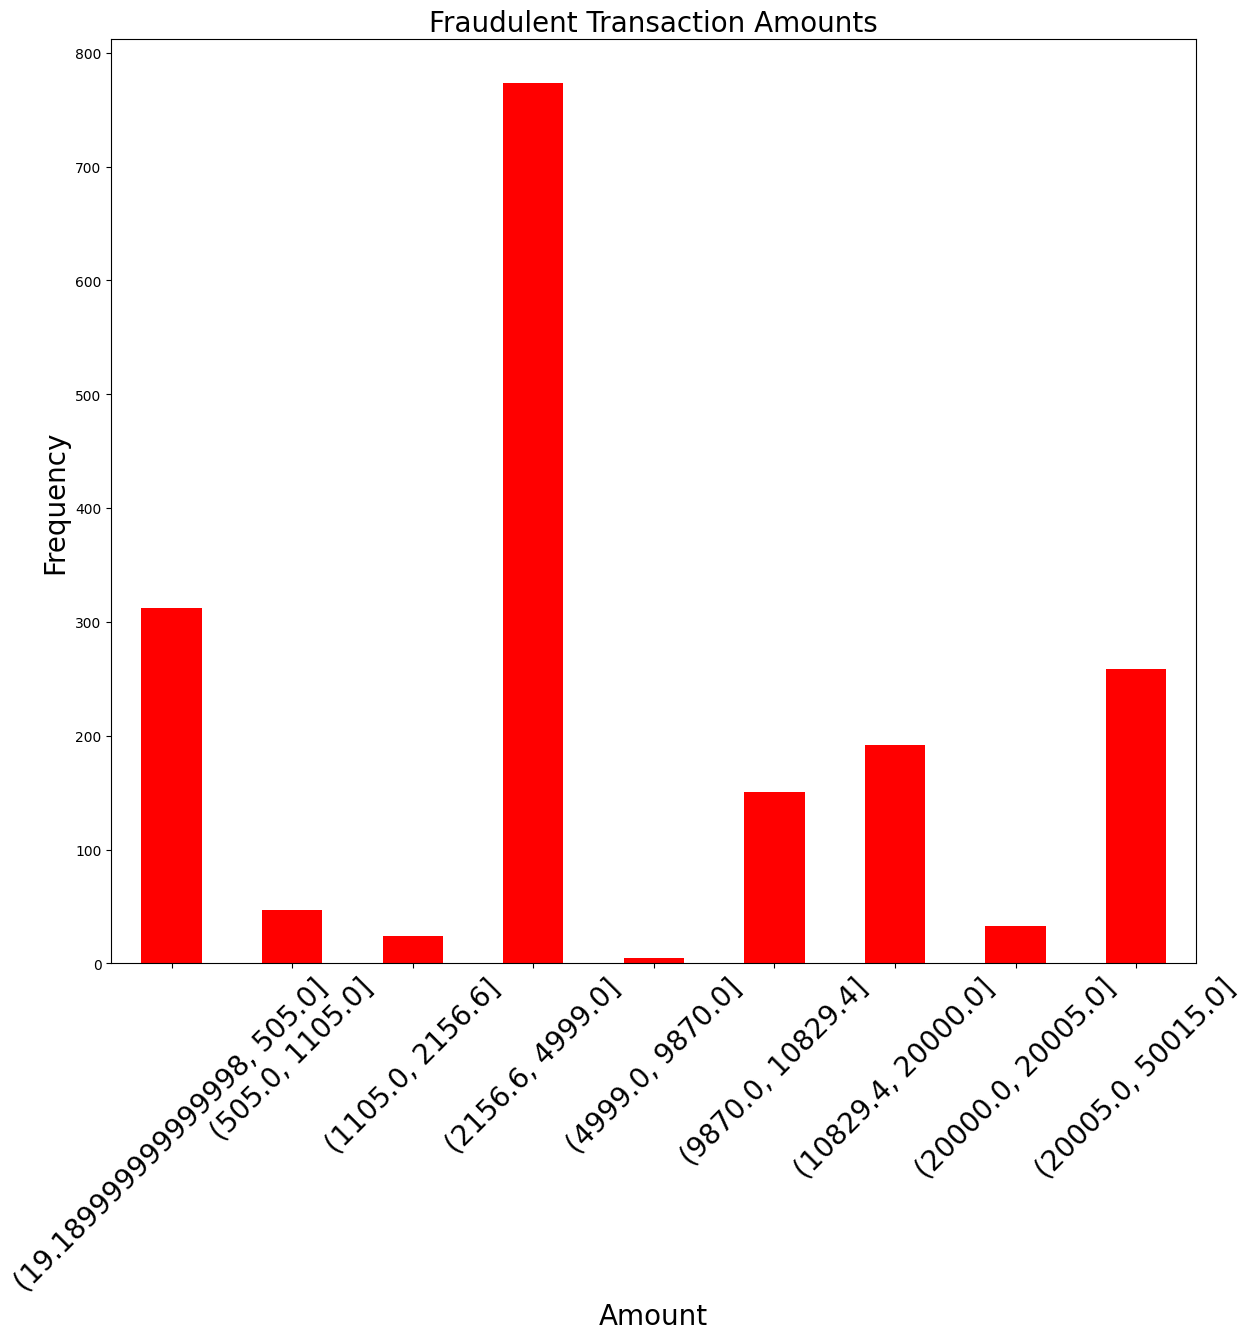

In [12]:
# Plot the number of fraud transactions per bin

plt.figure(figsize=(14, 12))
fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Fraudulent Transaction Amounts', color='red')
plt.xticks(rotation=45, fontsize=20)
plt.xticks(range(len(bins.cat.categories)), bins.cat.categories)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Amount', fontsize=20)
plt.title('Fraudulent Transaction Amounts', fontsize=20)
plt.show()

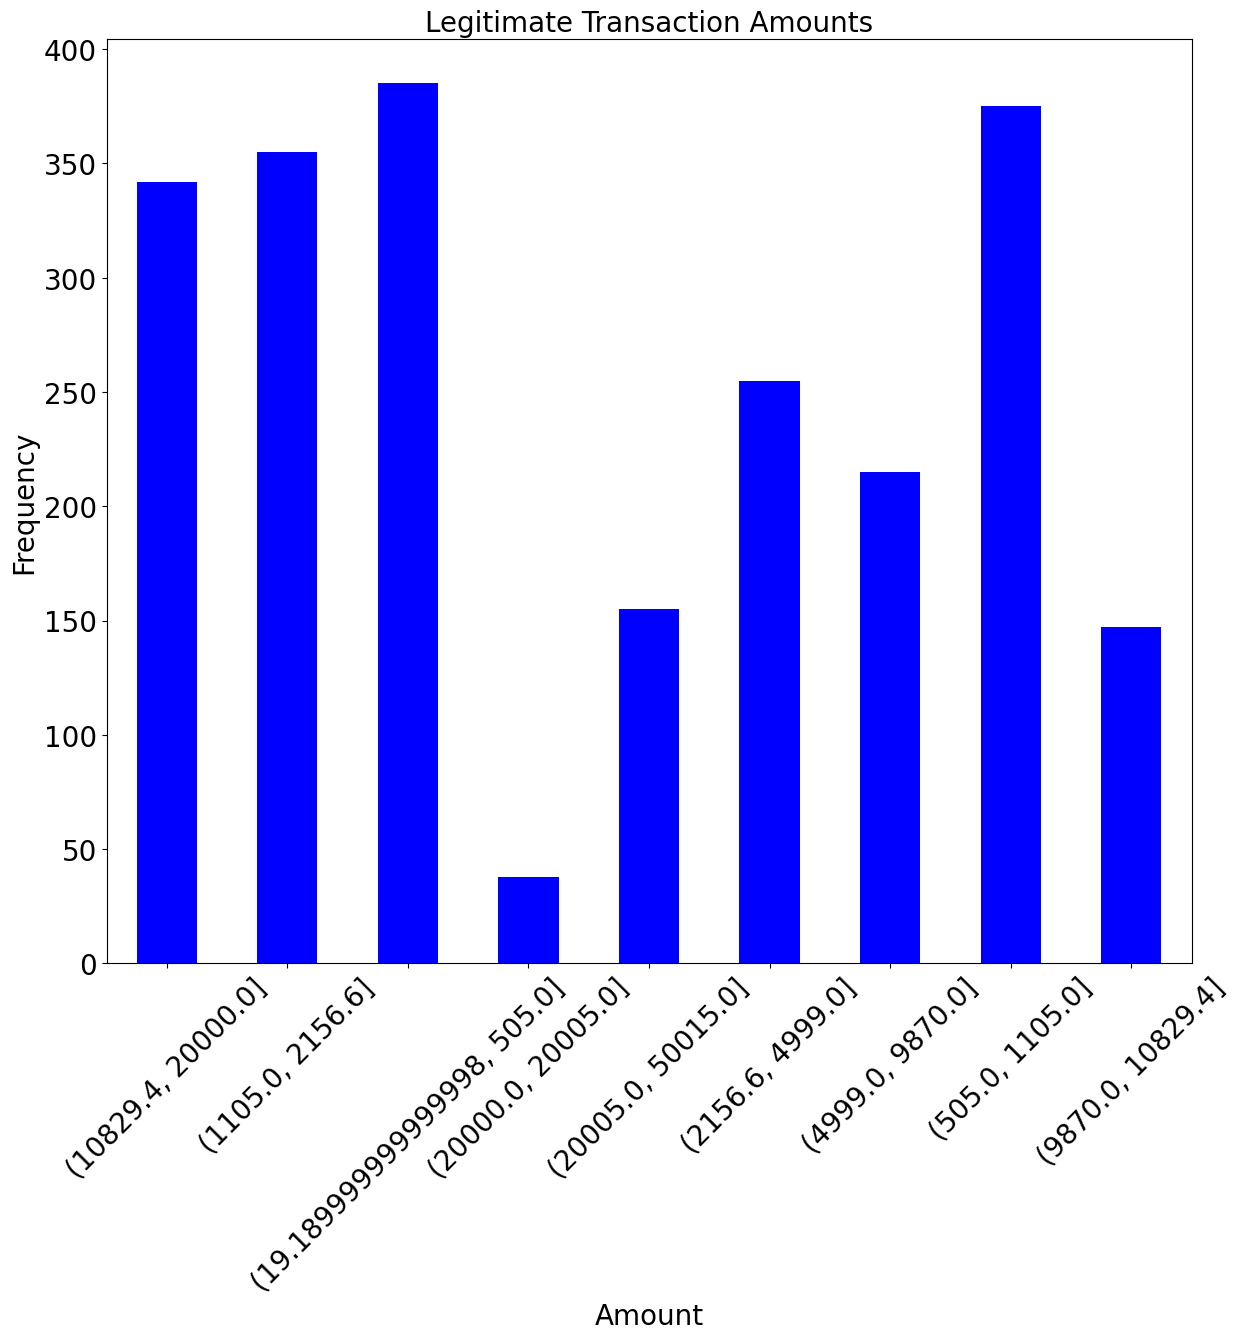

In [13]:
# Plot the number of legit transactions per bin

plt.figure(figsize=(14, 12))
not_fraud['amount_bins'].value_counts().sort_index().plot(kind='bar', title='Legitimate Transaction Amounts', color='blue')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Amount', fontsize=20)
plt.title('Legitimate Transaction Amounts', fontsize=20)
plt.show()

In [14]:

bin = 15
# Filter the DataFrame for bin
bin_range = fraud[fraud['amount_bins'] == bin]['amount']

# Print out the range of values in bin 8
print(f"Range of values in bin {bin}:")
print(f"Min value: {bin_range.min()}")
print(f"Max value: {bin_range.max()}")



Range of values in bin 15:
Min value: nan
Max value: nan


In [15]:
# Filter out 'surname' == 'tan'
print(df.columns)
df_filtered = df[df['surname'] == 'tan']
df_filtered = df_filtered

Index(['success_redirect_url', 'account_details', 'expires_at',
       'refunded_amount', 'payment_channel_transaction_id',
       'linked_account_id', 'settlement_date', 'failure_code', 'callback_url',
       'status', 'channel_account_reference', 'updated', 'checkout_url',
       'client_type', 'id', 'payment_channel_verification_id',
       'idempotency_key', 'ledger_transaction_id', 'time', 'given_names',
       'business_id', 'end_customer_id', 'created', 'middle_name', 'amount',
       'email', 'channel_code', 'failure_redirect_url', 'customer_id',
       'required_action', 'surname', 'payment_channel_reference_id',
       'account_hash', 'dt', 'account_type', 'bank_acc',
       'otp_expiration_timestamp', 'payment_method_id', 'reference_id',
       'enable_otp', 'is_fraud', 'amount_bins', 'refunded_amount_bins'],
      dtype='object')


In [16]:
# Compare columns
equal_rows = df['customer_id'] == df['end_customer_id']

# Count equal and not equal rows
num_equal = equal_rows.sum()
num_not_equal = len(df) - num_equal

# Print results
print(f"Number of equal rows: {num_equal}")
print(f"Number of not equal rows: {num_not_equal}")

Number of equal rows: 2748
Number of not equal rows: 1315


In [17]:


# Filter the DataFrame for the amount condition
filtered_df = df[(df['amount'] > 1900) & (df['amount'] < 2006)]

# Calculate the number of fraudulent transactions
num_fraudulent = filtered_df['is_fraud'].sum()

# Calculate the total number of transactions in this subset
total_transactions = filtered_df.shape[0]

# Calculate the conditional probability
if total_transactions > 0:
    conditional_probability = num_fraudulent / total_transactions
else:
    conditional_probability = 0

conditional_probability

0.12173913043478261

In [25]:

print(df.columns)
print(df[['customer_id', 'account_hash', 'email', 'surname', 'middle_name', 'given_names', 'is_fraud']].head())


Index(['success_redirect_url', 'account_details', 'expires_at',
       'refunded_amount', 'payment_channel_transaction_id',
       'linked_account_id', 'settlement_date', 'failure_code', 'callback_url',
       'status', 'channel_account_reference', 'updated', 'checkout_url',
       'client_type', 'id', 'payment_channel_verification_id',
       'idempotency_key', 'ledger_transaction_id', 'time', 'given_names',
       'business_id', 'end_customer_id', 'created', 'middle_name', 'amount',
       'email', 'channel_code', 'failure_redirect_url', 'customer_id',
       'required_action', 'surname', 'payment_channel_reference_id',
       'account_hash', 'dt', 'account_type', 'bank_acc',
       'otp_expiration_timestamp', 'payment_method_id', 'reference_id',
       'enable_otp', 'is_fraud', 'amount_bins', 'refunded_amount_bins'],
      dtype='object')
                            customer_id  \
0  8f3f3f04-8d1d-491b-bda3-2a9486cfe622   
1  fe701539-f3b2-41aa-a070-9170eb9313af   
2  fe701539-f3b2-